<a href="https://colab.research.google.com/github/CJTAYL/.github.io/blob/main/COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 High Risk Population Analysis

Project analyzing data used by FiveThirtyEight to discuss how a South Carolina commmunity prepared for COVID-19. The data were retrieved from FiveThirtyEight's GitHub repository. The link to the original article is provided below.

https://fivethirtyeight.com/features/how-one-high-risk-community-in-rural-south-carolina-is-bracing-for-covid-19/

In [7]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import requests
import io
from google.colab import data_table
data_table.disable_dataframe_formatter()

# Set dots per inch for visualizations
plt.rcParams["figure.dpi"] = 175

# URL for raw data from FiveThirtyEight GitHub Repository
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/covid-geography/mmsa-icu-beds.csv"

# Code to download data from URL
download = requests.get(url).content

In [8]:
# Data frame from downloaded CSV
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Code to identify the highest total percentage at risk
df['total_percent_at_risk'].max()

# Subset of data frame with total percentage at risk above 68%
percent_68 = df.loc[df['total_percent_at_risk'] > '68.00']

# List of abbreviations
percent_68.insert(1, "Abbv", ["SL", "MB", "TP", "DB", "LR", "BR", "HN", "FL", "SC", "EV", "CN"], True)

# List of percentages as floats - could not change type due to '%' symbol
percent_68.insert(2, "Percent_High_Risk", [68.32, 73.79, 68.10, 71.11, 73.48, 80.73, 72.66, 72.31, 68.20, 69.07, 75.97], True)

# Deleting column that previously listed percentages as strings
del percent_68['total_percent_at_risk']

# Subset of dataframe to create table
percent_table = percent_68[['MMSA', 'Abbv', 'Percent_High_Risk']]

In [9]:
# Table displaying abbreviation for metro areas and percent of population that is considered high risk
fig = go.Figure(data=[go.Table(
     header=dict(values=list(percent_table.columns),
                fill_color='lightgray',
                align='center'),
    cells=dict(values=[percent_table.MMSA, percent_table.Abbv, percent_table.Percent_High_Risk],
               fill_color='white',
               align='left'))
])

fig.show()

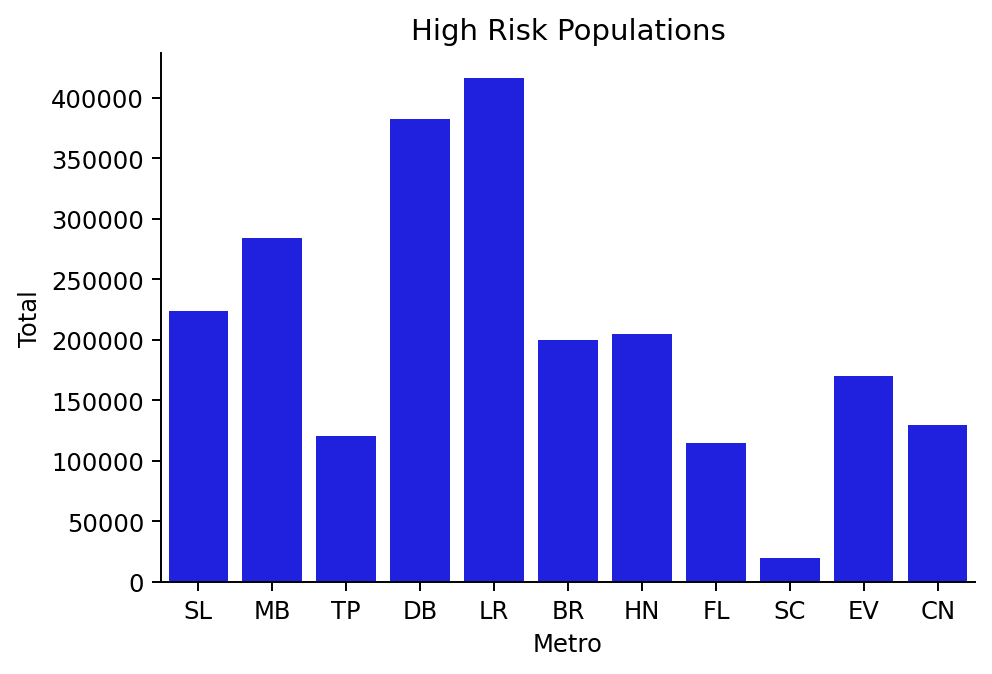

In [10]:
# Visualization for high risk populations across metro areas
sns.barplot(x='Abbv', y='total_at_risk', color='blue', data=percent_68)
plt.ylabel("Total")
plt.xlabel("Metro")
plt.title("High Risk Populations")
sns.despine()

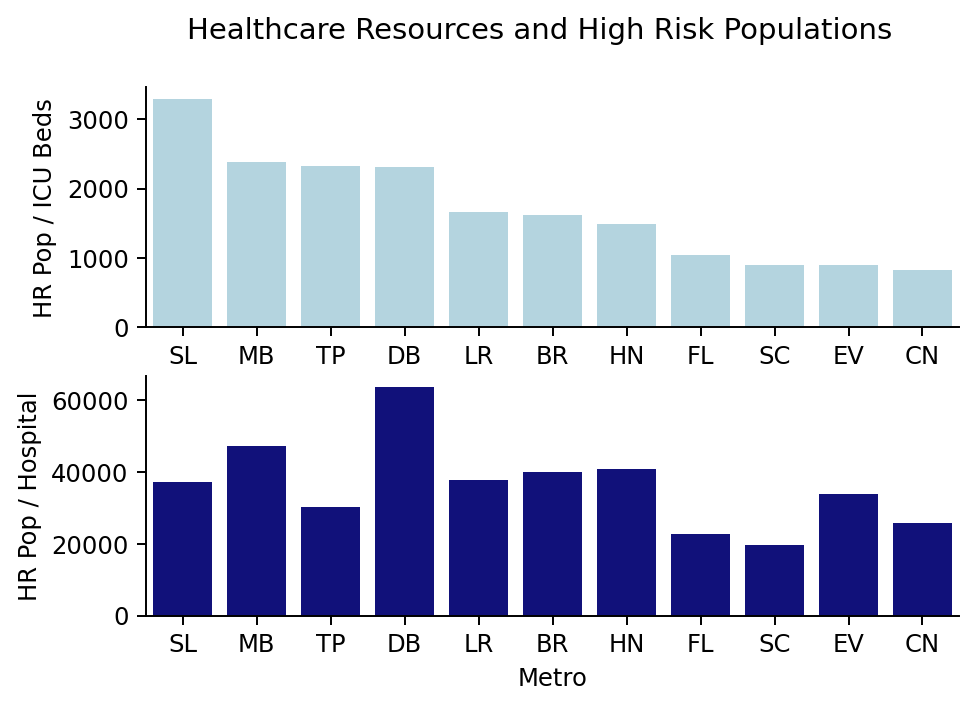

In [11]:
# Subplot for comparison of healthccare resources and high risk population
fig, axes = plt.subplots(2, 1)
fig.suptitle("Healthcare Resources and High Risk Populations")
sns.barplot(ax=axes[0], x='Abbv', y='high_risk_per_ICU_bed', color='lightblue', data=percent_68)
axes[0].set_ylabel("HR Pop / ICU Beds")
sns.barplot(ax=axes[1], x='Abbv', y='high_risk_per_hospital', color='darkblue', data=percent_68)
axes[1].set_ylabel("HR Pop / Hospital")
axes[1].set_xlabel("Metro")
sns.despine()